# hr-analytics-attrition-prediction-recommendation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
!pip install pandas openpyxl

!pip install jovian --upgrade -q
import jovian

In [2]:
import os
data_dir = './work'
os.listdir(data_dir)

['Attrition of Last Three Years - TISS HR Analytics.xls']

In [3]:
df = pd.read_excel(data_dir + '/Attrition of Last Three Years - TISS HR Analytics.xls')
df.head(3)

,Emp No,HQ,State,Age,DOJ,Date of Resignation,Tenure with Tata,Total Experience,Last Rating,SR Target,SR Ach,Last CTC Drawn,Education Background,New Offer,Unnamed: 14,% Increase
0,709022,Hisar,1,53,2015-05-01,2016-07-20,1.221918,1,3,150.00,175.000000,440042.875969,M.Sc.(Agri),6.000000e+05,NaN,0.363503
1,711246,Kurukshetra,1,37,2016-07-26,2016-12-02,0.353425,11,2,138.41,166.367434,665692.400000,B.Sc.(Agri),7.800000e+05,NaN,0.171712
2,707658,Sirsa,1,44,2014-05-01,2017-05-03,3.008219,9,5,197.19,581.241054,858931.627962,B.Sc.(Agri),1.065075e+06,NaN,0.240000


In [4]:
df.drop('Unnamed: 14', axis=1, inplace=True)

In [5]:
df.head(3)

,Emp No,HQ,State,Age,DOJ,Date of Resignation,Tenure with Tata,Total Experience,Last Rating,SR Target,SR Ach,Last CTC Drawn,Education Background,New Offer,% Increase
0,709022,Hisar,1,53,2015-05-01,2016-07-20,1.221918,1,3,150.00,175.000000,440042.875969,M.Sc.(Agri),6.000000e+05,0.363503
1,711246,Kurukshetra,1,37,2016-07-26,2016-12-02,0.353425,11,2,138.41,166.367434,665692.400000,B.Sc.(Agri),7.800000e+05,0.171712
2,707658,Sirsa,1,44,2014-05-01,2017-05-03,3.008219,9,5,197.19,581.241054,858931.627962,B.Sc.(Agri),1.065075e+06,0.240000


In [6]:
# To see the dimension of the dataset wcgs
df.shape

(67, 15)

In [7]:
# to see the datatypes of each column
df.dtypes

Emp No                           int64
HQ                              object
State                            int64
Age                              int64
DOJ                     datetime64[ns]
Date of Resignation     datetime64[ns]
Tenure with Tata               float64
Total Experience                 int64
Last Rating                      int64
SR Target                      float64
SR Ach                         float64
Last CTC Drawn                 float64
Education Background            object
New Offer                      float64
% Increase                     float64
dtype: object

In [8]:
df.columns

Index(['Emp No', 'HQ', 'State', 'Age', 'DOJ', 'Date of Resignation',
       'Tenure with Tata', 'Total Experience', 'Last Rating', 'SR Target',
       'SR Ach', 'Last CTC Drawn', 'Education Background', 'New Offer',
       '% Increase'],
      dtype='object')

In [9]:
# To check the numerical measures of each column
df.describe()

,Emp No,State,Age,Tenure with Tata,Total Experience,Last Rating,SR Target,SR Ach,Last CTC Drawn,New Offer,% Increase
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,64.000000,64.000000,6.700000e+01,6.700000e+01,67.000000
mean,699173.880597,3.626866,33.283582,2.455522,4.119403,2.701493,301.702342,314.235984,6.578304e+05,8.377698e+05,0.281653
std,59578.368759,1.412453,10.689567,2.900094,3.755894,0.778789,504.731269,632.517900,3.677201e+05,4.557929e+05,0.068722
min,362059.000000,1.000000,23.000000,0.161644,0.000000,1.000000,0.600000,0.230000,3.239353e+05,4.049191e+05,0.171712
25%,707938.000000,3.000000,26.000000,0.613699,1.000000,2.000000,68.919272,60.513846,4.378281e+05,5.543846e+05,0.245000
50%,710692.000000,4.000000,29.000000,1.037272,3.000000,3.000000,140.718794,145.806288,5.526580e+05,7.450000e+05,0.250000
75%,711686.500000,5.000000,36.500000,3.161644,6.500000,3.000000,247.035000,220.937527,7.163101e+05,8.939006e+05,0.297968
max,713145.000000,5.000000,59.000000,14.175342,18.000000,5.000000,2686.000000,3692.000000,2.396801e+06,2.996001e+06,0.486493


### Data Cleaning

In [10]:
# To see the details of each column and how many nulls are there in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Emp No                67 non-null     int64         
 1   HQ                    66 non-null     object        
 2   State                 67 non-null     int64         
 3   Age                   67 non-null     int64         
 4   DOJ                   67 non-null     datetime64[ns]
 5   Date of Resignation   67 non-null     datetime64[ns]
 6   Tenure with Tata      67 non-null     float64       
 7   Total Experience      67 non-null     int64         
 8   Last Rating           67 non-null     int64         
 9   SR Target             64 non-null     float64       
 10  SR Ach                64 non-null     float64       
 11  Last CTC Drawn        67 non-null     float64       
 12  Education Background  67 non-null     object        
 13  New Offer             

In [11]:
df.isna().sum()

Emp No                  0
HQ                      1
State                   0
Age                     0
DOJ                     0
Date of Resignation     0
Tenure with Tata        0
Total Experience        0
Last Rating             0
SR Target               3
SR Ach                  3
Last CTC Drawn          0
Education Background    0
New Offer               0
% Increase              0
dtype: int64

In [12]:
# To check if there if any duplication in rows
df.duplicated().sum()

0

In [13]:
# To check the relevant columns
df.corr()

,Emp No,State,Age,Tenure with Tata,Total Experience,Last Rating,SR Target,SR Ach,Last CTC Drawn,New Offer,% Increase
Emp No,1.000000,-0.170483,0.116503,-0.634521,-0.039129,0.036320,-0.606840,-0.609920,-0.313929,-0.311136,0.076925
State,-0.170483,1.000000,-0.339097,0.055073,-0.054308,-0.144114,0.151726,0.056355,0.142534,0.154817,0.057704
Age,0.116503,-0.339097,1.000000,0.009706,-0.004630,0.055823,-0.050601,0.031332,-0.128874,-0.119651,0.156592
Tenure with Tata,-0.634521,0.055073,0.009706,1.000000,0.043876,0.115488,0.584656,0.673088,0.437974,0.444094,-0.014982
Total Experience,-0.039129,-0.054308,-0.004630,0.043876,1.000000,-0.080869,0.346003,0.326006,0.496322,0.483799,-0.229503
Last Rating,0.036320,-0.144114,0.055823,0.115488,-0.080869,1.000000,-0.015320,0.008386,-0.084895,-0.087377,-0.060234
SR Target,-0.606840,0.151726,-0.050601,0.584656,0.346003,-0.015320,1.000000,0.934608,0.741488,0.744291,-0.131137
SR Ach,-0.609920,0.056355,0.031332,0.673088,0.326006,0.008386,0.934608,1.000000,0.758381,0.756798,-0.129288
Last CTC Drawn,-0.313929,0.142534,-0.128874,0.437974,0.496322,-0.084895,0.741488,0.758381,1.000000,0.996637,-0.214524
New Offer,-0.311136,0.154817,-0.119651,0.444094,0.483799,-0.087377,0.744291,0.756798,0.996637,1.000000,-0.138894


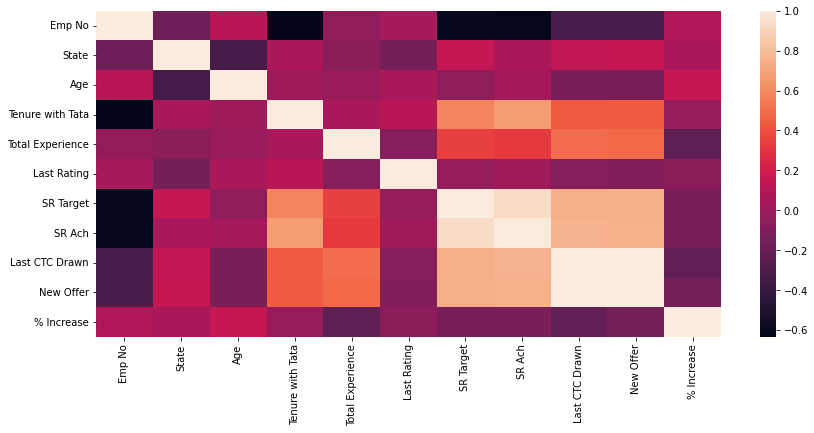

In [14]:
corr= df.corr()
plt.figure(figsize=[14,6])
sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns)
plt.show()

### Taking Age as Variable

In [15]:
maxage = df.Age.max()
minage = df.Age.min()
rangeage= maxage - minage
avgage= df.Age.mean()
medianage= df.Age.median()
modeage= df.Age.mode().tolist()
sdage= df.Age.std()
skewage= df.Age.skew()

In [16]:
print('max of age ',maxage)
print('min of age ',minage)
print('range of age ',rangeage)
print('average of age ', round(avgage, 2))
print('median of age ',medianage)
print('mode of age ',modeage)
print('standard deviation of age ',round(sdage, 3))
print('skewness of age ',round(skewage, 3))

max of age  59
min of age  23
range of age  36
average of age  33.28
median of age  29.0
mode of age  [24, 28]
standard deviation of age  10.69
skewness of age  1.201


In [17]:
def create_bins(lower_bound, width, quantity):
    bins = []
    for low in range(lower_bound, 
                     lower_bound + quantity*width + 1, width):
        bins.append((low, low+width))
    return bins

In [18]:
bins1 = create_bins(lower_bound=21,
                   width=5,
                   quantity=7)

bins1

[(21, 26),
 (26, 31),
 (31, 36),
 (36, 41),
 (41, 46),
 (46, 51),
 (51, 56),
 (56, 61)]

In [19]:
bins2 = pd.IntervalIndex.from_tuples(bins1)

In [20]:
categorical_age = pd.cut(df.Age, bins2)
print(categorical_age)

0     (51, 56]
1     (36, 41]
2     (41, 46]
3     (56, 61]
4     (56, 61]
        ...   
62    (26, 31]
63    (21, 26]
64    (21, 26]
65    (26, 31]
66    (21, 26]
Name: Age, Length: 67, dtype: category
Categories (8, interval[int64, right]): [(21, 26] < (26, 31] < (31, 36] < (36, 41] < (41, 46] < (46, 51] < (51, 56] < (56, 61]]


<AxesSubplot:xlabel='Age', ylabel='count'>

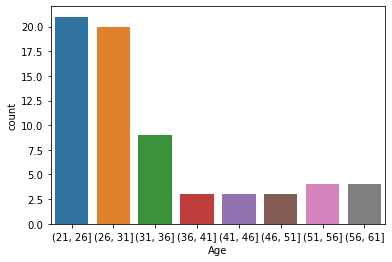

In [21]:
sns.countplot(x=categorical_age)

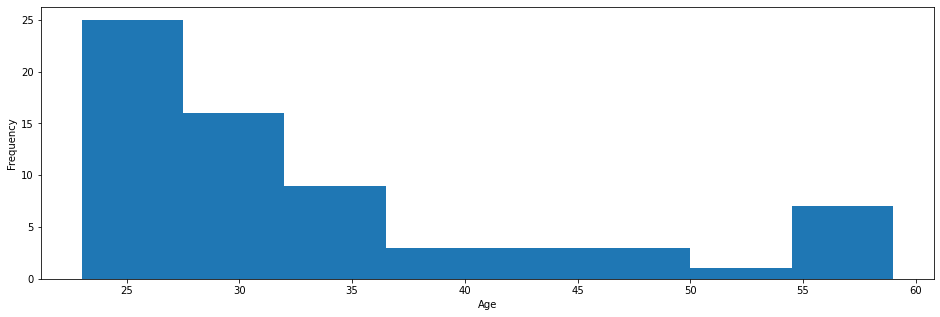

In [22]:
plt.figure(figsize=[16,5])
plt.hist(df['Age'], bins=8)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

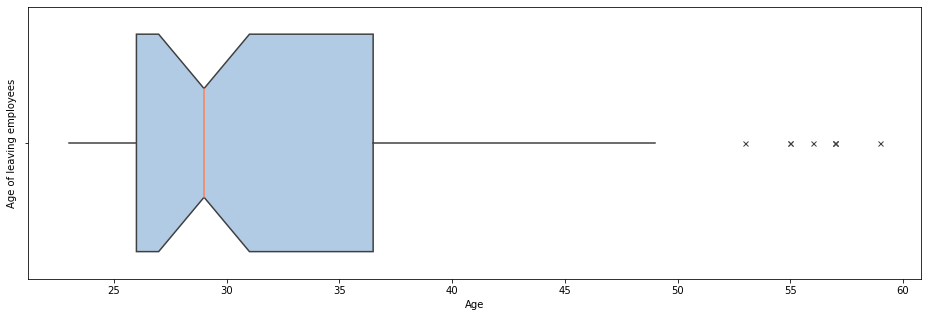

In [23]:
plt.figure(figsize=[16,5])
sns.boxplot(
    data=df, x="Age",    notch=True, showcaps=False,    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},    medianprops={"color": "coral"})
plt.ylabel('Age of leaving employees')
plt.show()

In [24]:
## Creating a dummy variable for individuals below 35 years of age

def get_categories(x):
    if x<36:
        return 1
    else:
        return 0
    
df['is_young_emp'] = df['Age'].apply(get_categories)

In [25]:
df.head(3)

,Emp No,HQ,State,Age,DOJ,Date of Resignation,Tenure with Tata,Total Experience,Last Rating,SR Target,SR Ach,Last CTC Drawn,Education Background,New Offer,% Increase,is_young_emp
0,709022,Hisar,1,53,2015-05-01,2016-07-20,1.221918,1,3,150.00,175.000000,440042.875969,M.Sc.(Agri),6.000000e+05,0.363503,0
1,711246,Kurukshetra,1,37,2016-07-26,2016-12-02,0.353425,11,2,138.41,166.367434,665692.400000,B.Sc.(Agri),7.800000e+05,0.171712,0
2,707658,Sirsa,1,44,2014-05-01,2017-05-03,3.008219,9,5,197.19,581.241054,858931.627962,B.Sc.(Agri),1.065075e+06,0.240000,0


### Taking Tenure with Tata as Variable

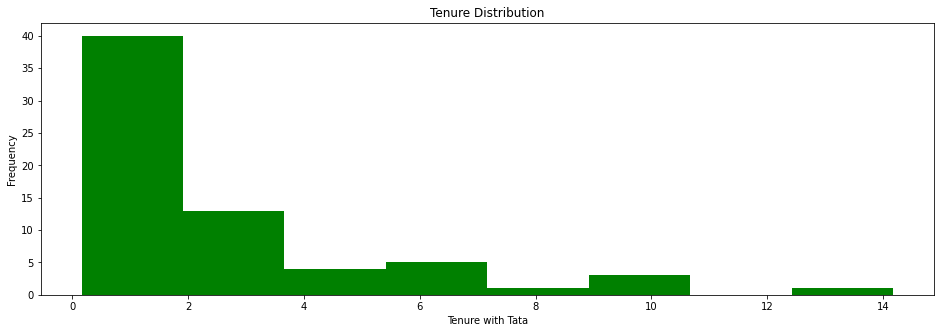

In [26]:
plt.figure(figsize=[16,5])
plt.hist(df['Tenure with Tata'], bins=8, color='green')
plt.title('Tenure Distribution')
plt.xlabel('Tenure with Tata')
plt.ylabel('Frequency')
plt.show()

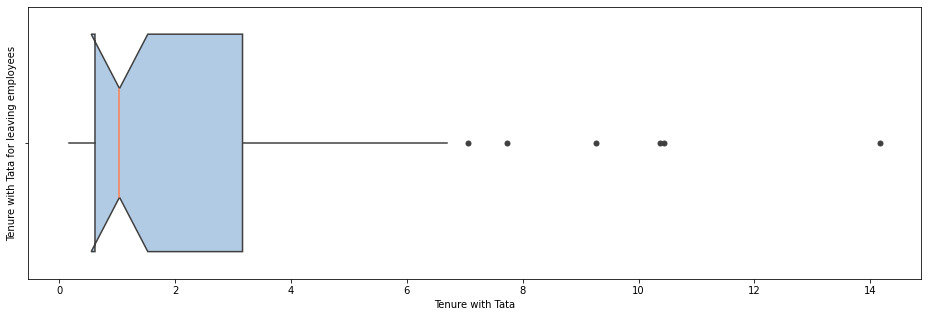

In [27]:
plt.figure(figsize=[16,5])
sns.boxplot(
    data=df, x="Tenure with Tata",    notch=True, showcaps=False,    flierprops={"marker": "o"},
    boxprops={"facecolor": (.4, .6, .8, .5)},    medianprops={"color": "coral"})
plt.ylabel('Tenure with Tata for leaving employees')
plt.show()

In [28]:
def get_tenure_category(x):
    if x <= 3 :
        return 1
    else :
        return 0
    
df['is_tenure<4'] = df['Tenure with Tata'].apply(get_tenure_category)

In [29]:
df.rename(columns = {'is_tenure<4':'is_tenure<=3'}, inplace = True)

### Taking Total Experience as Variable

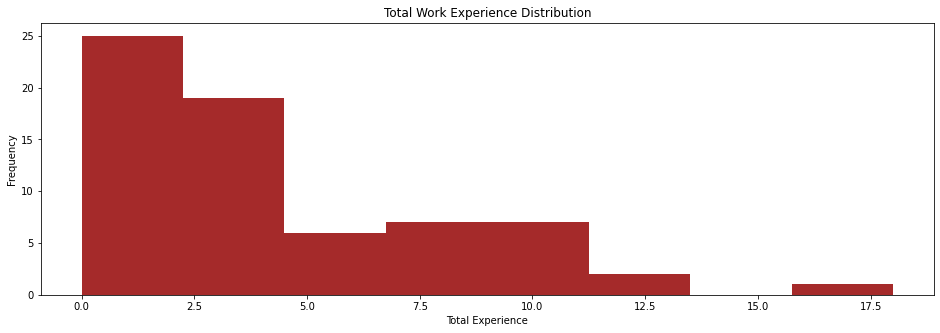

In [30]:
plt.figure(figsize=[16,5])
plt.hist(df['Total Experience'], bins=8, color='brown')
plt.title('Total Work Experience Distribution')
plt.xlabel('Total Experience')
plt.ylabel('Frequency')
plt.show()

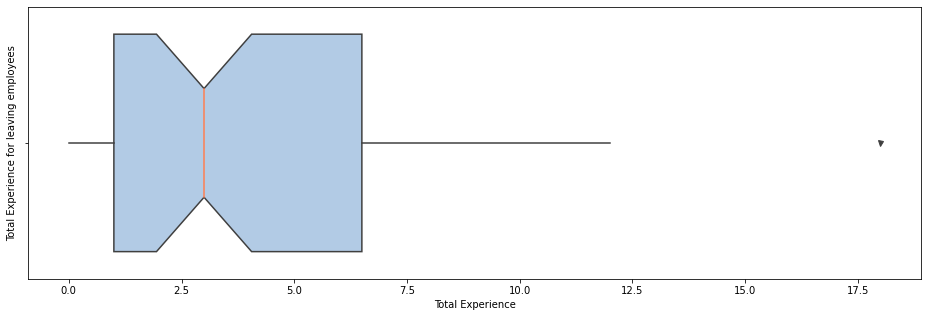

In [31]:
plt.figure(figsize=[16,5])
sns.boxplot(
    data=df, x="Total Experience",    notch=True, showcaps=False,    flierprops={"marker": "v"},
    boxprops={"facecolor": (.4, .6, .8, .5)},    medianprops={"color": "coral"})
plt.ylabel('Total Experience for leaving employees')
plt.show()

In [32]:
def get_exp_category(x):
    if x <= 5 :
        return 1
    else :
        return 0
    
df['is_exp<=5'] = df['Total Experience'].apply(get_tenure_category)

In [33]:
df.head(3)

,Emp No,HQ,State,Age,DOJ,Date of Resignation,Tenure with Tata,Total Experience,Last Rating,SR Target,SR Ach,Last CTC Drawn,Education Background,New Offer,% Increase,is_young_emp,is_tenure<=3,is_exp<=5
0,709022,Hisar,1,53,2015-05-01,2016-07-20,1.221918,1,3,150.00,175.000000,440042.875969,M.Sc.(Agri),6.000000e+05,0.363503,0,1,1
1,711246,Kurukshetra,1,37,2016-07-26,2016-12-02,0.353425,11,2,138.41,166.367434,665692.400000,B.Sc.(Agri),7.800000e+05,0.171712,0,1,0
2,707658,Sirsa,1,44,2014-05-01,2017-05-03,3.008219,9,5,197.19,581.241054,858931.627962,B.Sc.(Agri),1.065075e+06,0.240000,0,0,0


### Taking Last Rating as Variable

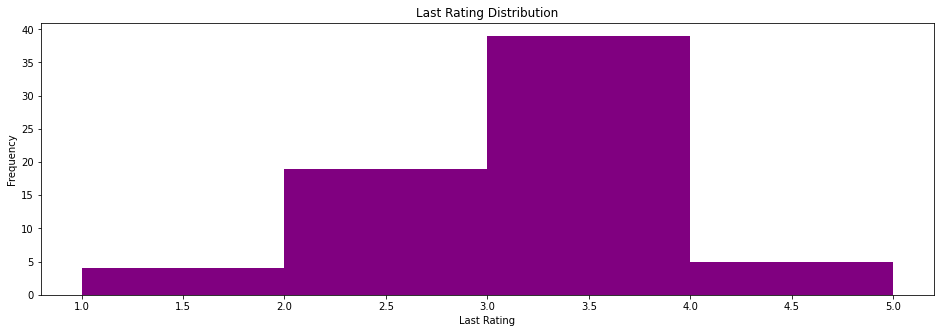

In [34]:
plt.figure(figsize=[16,5])
plt.hist(df['Last Rating'], bins=4, color='purple')
plt.title('Last Rating Distribution')
plt.xlabel('Last Rating')
plt.ylabel('Frequency')
plt.show()

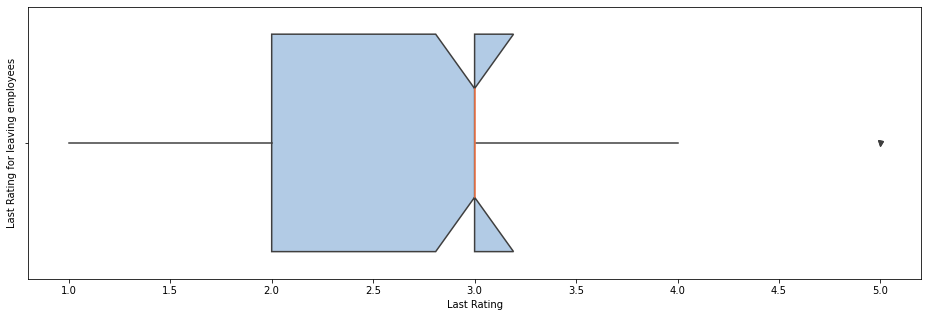

In [35]:
plt.figure(figsize=[16,5])
sns.boxplot(
    data=df, x="Last Rating",    notch=True, showcaps=False,    flierprops={"marker": "v"},
    boxprops={"facecolor": (.4, .6, .8, .5)},    medianprops={"color": "coral"})
plt.ylabel('Last Rating for leaving employees')
plt.show()

In [36]:
def get_rating_category(x):
    if x == 2 or x ==3:
        return 1
    else:
        return 0
    
df['israting_bad'] =  df['Last Rating'].apply(get_rating_category)

### Taking Education Background as Variable

In [37]:
## Cleaning the education background column by dividing it to clear categories of PH.D M.Sc MBA and BA/B.Sc

def get_edu_categories(edu):

    if edu.__contains__('PH.D'):
        return 'PH.D'
    elif edu.__contains__('M.Sc'):
        return 'M.Sc'
    elif edu.__contains__('MBA') or edu.__contains__('PGDABPM'):
        return 'MBA/PGDABPM'
    else : 
        return "BA/BSc"
    
df['Edu_category']= df['Education Background'].apply(get_edu_categories)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


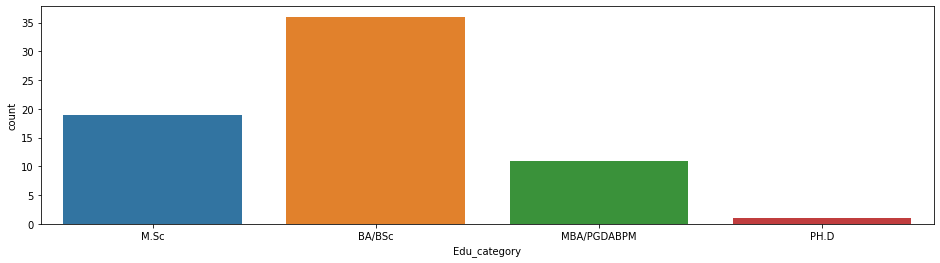

In [38]:
plt.figure(figsize=[16,4])
sns.countplot(df['Edu_category'])
plt.show()

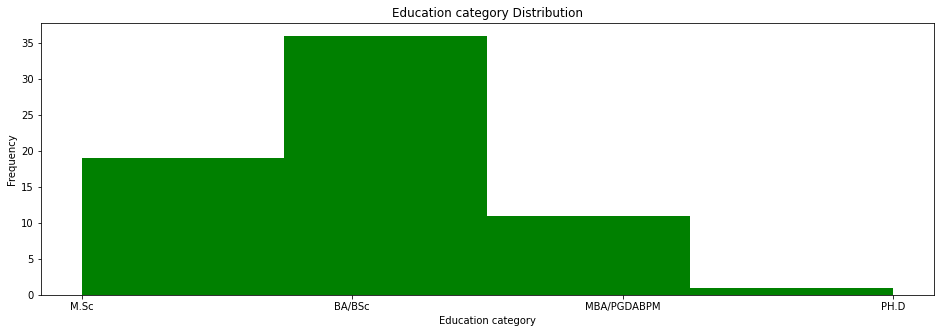

In [39]:
plt.figure(figsize=[16,5])
plt.hist(df['Edu_category'], bins=4, color='green')
plt.title('Education category Distribution')
plt.xlabel('Education category')
plt.ylabel('Frequency')
plt.show()

In [40]:
df.head(3)

,Emp No,HQ,State,Age,DOJ,Date of Resignation,Tenure with Tata,Total Experience,Last Rating,SR Target,SR Ach,Last CTC Drawn,Education Background,New Offer,% Increase,is_young_emp,is_tenure<=3,is_exp<=5,israting_bad,Edu_category
0,709022,Hisar,1,53,2015-05-01,2016-07-20,1.221918,1,3,150.00,175.000000,440042.875969,M.Sc.(Agri),6.000000e+05,0.363503,0,1,1,1,M.Sc
1,711246,Kurukshetra,1,37,2016-07-26,2016-12-02,0.353425,11,2,138.41,166.367434,665692.400000,B.Sc.(Agri),7.800000e+05,0.171712,0,1,0,1,BA/BSc
2,707658,Sirsa,1,44,2014-05-01,2017-05-03,3.008219,9,5,197.19,581.241054,858931.627962,B.Sc.(Agri),1.065075e+06,0.240000,0,0,0,0,BA/BSc


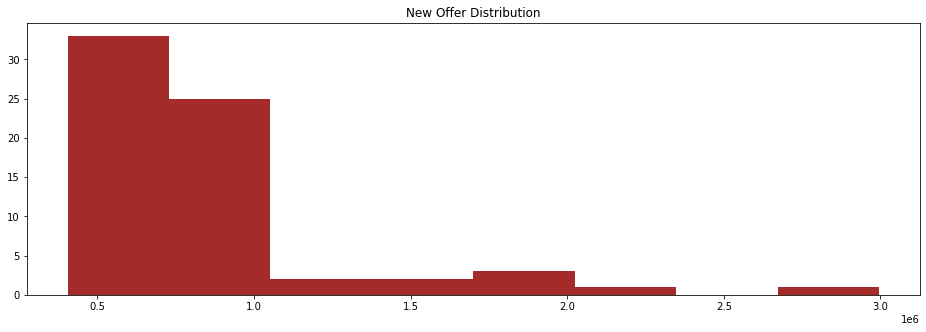

In [41]:
plt.figure(figsize=[16,5])
plt.hist(df['New Offer'], bins=8, color='brown')
plt.title('New Offer Distribution')
plt.show()

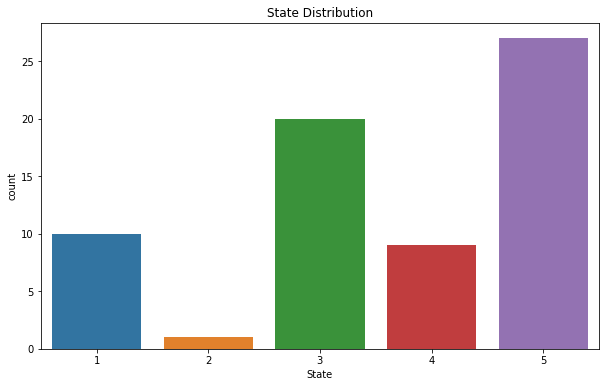

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='State')
plt.title('State Distribution')
plt.show()

### Hypothesis Testing

In [43]:
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats

In [44]:
count = df['is_young_emp'].value_counts()[1]
n_obs = df.shape[0]
value = 0.5  # null hypothesis proportion
stat, pval = proportions_ztest(count, n_obs, value)
# print the test result
print(pval)
if pval < 0.05:
    print(f"The proportion of individuals with age less than 36 years is significantly higher (p-value={pval:.4f})")
else:
    print(f"The proportion of individuals with age less than 36 years is not significantly higher (p-value={pval:.4f})")

1.9369712348090343e-05
The proportion of individuals with age less than 36 years is significantly higher (p-value=0.0000)


In [45]:
count = df['is_tenure<=3'].value_counts()[1]
n_obs = df.shape[0]
value = 0.5  # null hypothesis proportion
stat, pval = proportions_ztest(count, n_obs, value)
# print the test result
print(pval)
if pval < 0.05:
    print(f"The proportion of individuals with tenure in tata less than equal to 3 years is significantly higher than 0.5 (p-value={pval:.4f})")
else:
    print(f"The proportion of individuals tenure in tata less than equal to 3 years is not significantly higher than 0.5 (p-value={pval:.4f})")

1.9369712348090343e-05
The proportion of individuals with tenure in tata less than equal to 3 years is significantly higher than 0.5 (p-value=0.0000)


In [46]:
count = df['is_exp<=5'].value_counts()[1]
n_obs = df.shape[0]
value = 0.5  # null hypothesis proportion
stat, pval = proportions_ztest(count, n_obs, value)
# print the test result
print(pval)
if pval < 0.05:
    print(f"The proportion of individuals with total experience less than 5 years is significantly higher (p-value={pval:.4f})")
else:
    print(f"The proportion of individuals with total experience less than 5 years is not significantly higher (p-value={pval:.4f})")

0.26717950520037337
The proportion of individuals with total experience less than 5 years is not significantly higher (p-value=0.2672)


In [47]:
count = df['israting_bad'].value_counts()[1]
n_obs = df.shape[0]
value = 0.5  # null hypothesis proportion
stat, pval = proportions_ztest(count, n_obs, value)
# print the test result
print(pval)
if pval < 0.05:
    print(f"The proportion of individuals with last rating 2 or 3 is significantly higher (p-value={pval:.4f})")
else:
    print(f"The proportion of individuals with last rating 2 or 3 is not significantly higher (p-value={pval:.4f})")

1.6722671581425821e-18
The proportion of individuals with last rating 2 or 3 is significantly higher (p-value=0.0000)


In [48]:
df.head(3)

,Emp No,HQ,State,Age,DOJ,Date of Resignation,Tenure with Tata,Total Experience,Last Rating,SR Target,SR Ach,Last CTC Drawn,Education Background,New Offer,% Increase,is_young_emp,is_tenure<=3,is_exp<=5,israting_bad,Edu_category
0,709022,Hisar,1,53,2015-05-01,2016-07-20,1.221918,1,3,150.00,175.000000,440042.875969,M.Sc.(Agri),6.000000e+05,0.363503,0,1,1,1,M.Sc
1,711246,Kurukshetra,1,37,2016-07-26,2016-12-02,0.353425,11,2,138.41,166.367434,665692.400000,B.Sc.(Agri),7.800000e+05,0.171712,0,1,0,1,BA/BSc
2,707658,Sirsa,1,44,2014-05-01,2017-05-03,3.008219,9,5,197.19,581.241054,858931.627962,B.Sc.(Agri),1.065075e+06,0.240000,0,0,0,0,BA/BSc


## Bi variate Analysis

In [49]:
df.head(3)

,Emp No,HQ,State,Age,DOJ,Date of Resignation,Tenure with Tata,Total Experience,Last Rating,SR Target,SR Ach,Last CTC Drawn,Education Background,New Offer,% Increase,is_young_emp,is_tenure<=3,is_exp<=5,israting_bad,Edu_category
0,709022,Hisar,1,53,2015-05-01,2016-07-20,1.221918,1,3,150.00,175.000000,440042.875969,M.Sc.(Agri),6.000000e+05,0.363503,0,1,1,1,M.Sc
1,711246,Kurukshetra,1,37,2016-07-26,2016-12-02,0.353425,11,2,138.41,166.367434,665692.400000,B.Sc.(Agri),7.800000e+05,0.171712,0,1,0,1,BA/BSc
2,707658,Sirsa,1,44,2014-05-01,2017-05-03,3.008219,9,5,197.19,581.241054,858931.627962,B.Sc.(Agri),1.065075e+06,0.240000,0,0,0,0,BA/BSc


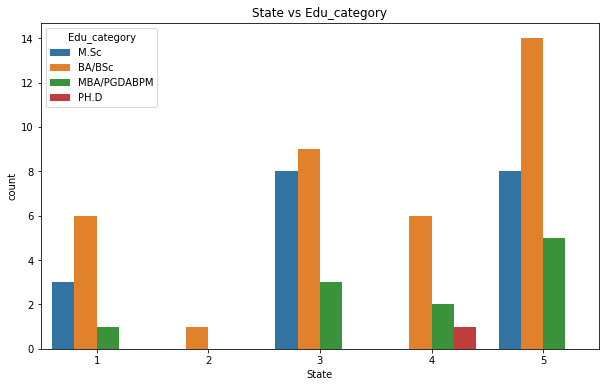

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(x='State', hue='Edu_category', data=df)
plt.title('State vs Edu_category')
plt.show()

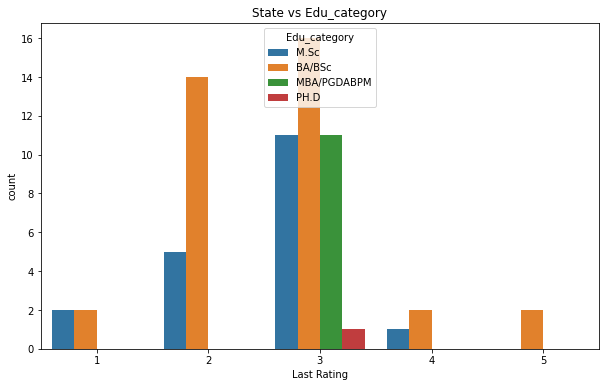

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Last Rating', hue='Edu_category')
plt.title('State vs Edu_category')
plt.show()

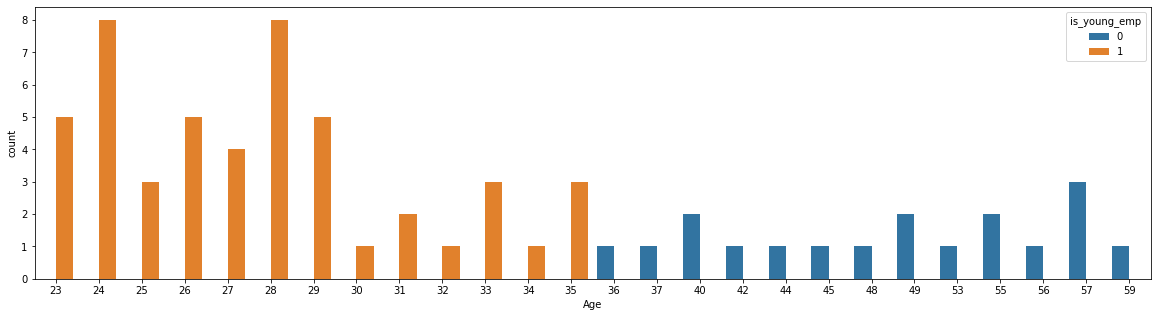

In [52]:
plt.figure(figsize=[20,5])
sns.countplot(x= df['Age'], data=df, hue=df['is_young_emp'])
plt.show()

In [53]:
edu_categories = df['Edu_category'].unique()

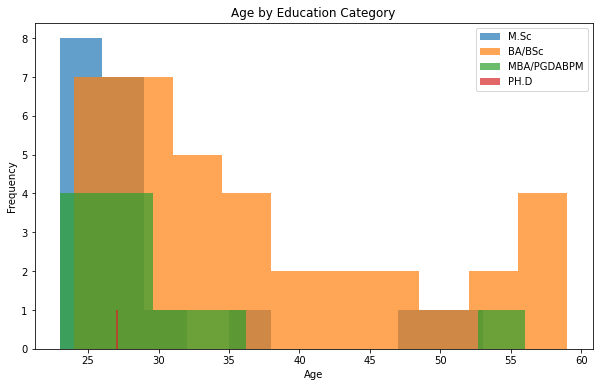

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))

for i, category in enumerate(edu_categories):
    data = df[df['Edu_category'] == category]['Age']
    ax.hist(data, bins=10, alpha=0.7, label=category)


ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Age by Education Category')
ax.legend()
plt.show()

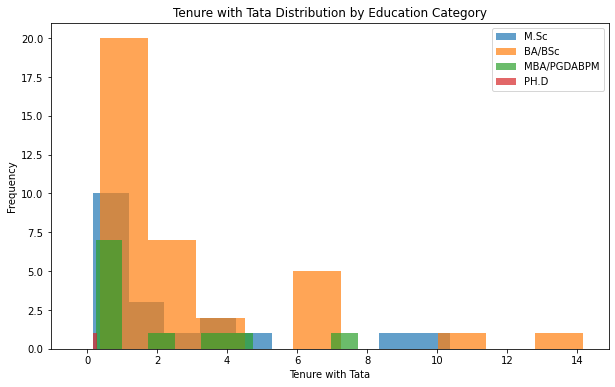

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))

for i, category in enumerate(edu_categories):
    data = df[df['Edu_category'] == category]['Tenure with Tata']
    ax.hist(data, bins=10, alpha=0.7, label=category)

ax.set_xlabel('Tenure with Tata')
ax.set_ylabel('Frequency')
ax.set_title('Tenure with Tata Distribution by Education Category')
ax.legend()
plt.show()

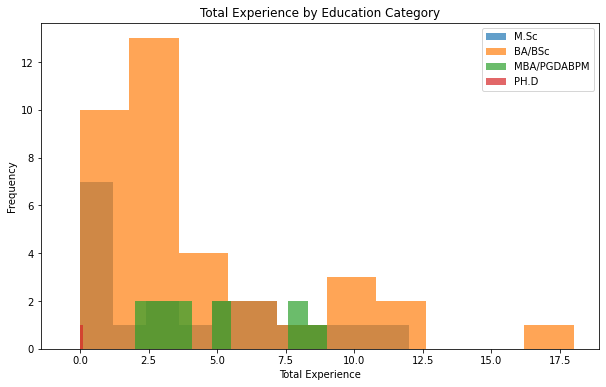

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))

for i, category in enumerate(edu_categories):
    data = df[df['Edu_category'] == category]['Total Experience']
    ax.hist(data, bins=10, alpha=0.7, label=category)


ax.set_xlabel('Total Experience')
ax.set_ylabel('Frequency')
ax.set_title('Total Experience by Education Category')
ax.legend()
plt.show()

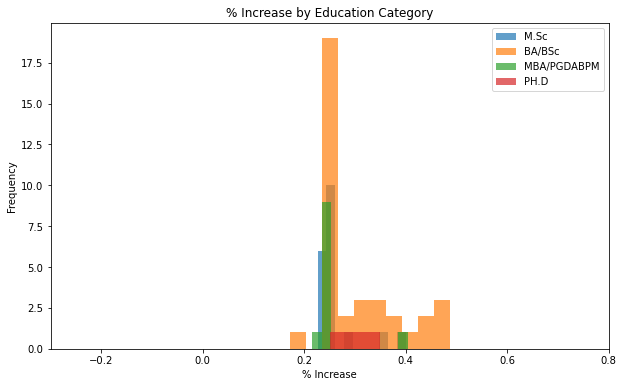

In [57]:

fig, ax = plt.subplots(figsize=(10, 6))

for i, category in enumerate(edu_categories):
    data = df[df['Edu_category'] == category]['% Increase']
    ax.hist(data, bins=10, alpha=0.7, label=category)


ax.set_xlabel('% Increase')
ax.set_ylabel('Frequency')
ax.set_title('% Increase by Education Category')
ax.legend()
plt.show()

In [58]:
# Analyzing percentage  of target achieved

df['target_percent_achieved'] = (df['SR Ach']/df['SR Target'])*100

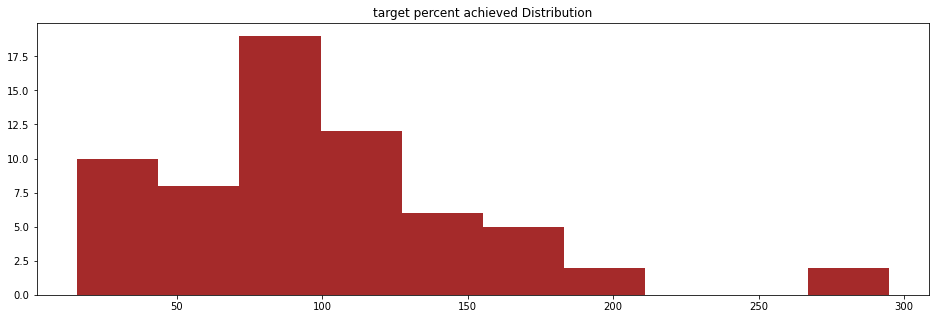

In [59]:
plt.figure(figsize=[16,5])
plt.hist(df['target_percent_achieved'], bins=10, color='brown')
plt.title('target percent achieved Distribution')
plt.show()

### Decision Tree

Creating an output variable "is_EarlyAttrition". I want to analyze the factors affecting early attrition.

In [60]:
df.head(3)

,Emp No,HQ,State,Age,DOJ,Date of Resignation,Tenure with Tata,Total Experience,Last Rating,SR Target,...,Last CTC Drawn,Education Background,New Offer,% Increase,is_young_emp,is_tenure<=3,is_exp<=5,israting_bad,Edu_category,target_percent_achieved
0,709022,Hisar,1,53,2015-05-01,2016-07-20,1.221918,1,3,150.00,...,440042.875969,M.Sc.(Agri),6.000000e+05,0.363503,0,1,1,1,M.Sc,116.666667
1,711246,Kurukshetra,1,37,2016-07-26,2016-12-02,0.353425,11,2,138.41,...,665692.400000,B.Sc.(Agri),7.800000e+05,0.171712,0,1,0,1,BA/BSc,120.198998
2,707658,Sirsa,1,44,2014-05-01,2017-05-03,3.008219,9,5,197.19,...,858931.627962,B.Sc.(Agri),1.065075e+06,0.240000,0,0,0,0,BA/BSc,294.761932


In [61]:
def get_attrition_category(x):
    if x > 2:
        return 0
    else:
        return 1

df['is_EarlyAttrition'] = df['Tenure with Tata'].apply(get_attrition_category)

In [62]:
df['Grand_Total_Experience'] = df['Tenure with Tata'] + df['Total Experience']

### Data pre processing

In [63]:
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV, train_test_split

In [64]:
!pip install -U imbalanced-learn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [65]:
df.dropna(inplace =True)
## data pre-processing

one_hot = pd.get_dummies(df['State'],drop_first = True)

df = df.join(one_hot)

In [66]:
#data_pre processing 

def edu_cat(x):
    if x == "PH.D":
        return 4
    elif x == "MBA":
        return 3
    elif x == "M.Sc":
        return 2
    else:
        return 1
    
df['edu_encoded'] = df['Edu_category'].apply(edu_cat)

In [67]:
from sklearn.tree import DecisionTreeClassifier, export_text

param_grid = {
    'max_depth': [3,4,5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_split': [2, 4, 8, 16],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}


# separate input features and target variable
X = df[['edu_encoded', 'Tenure with Tata', 'Total Experience', 'Last Rating', 'SR Target', 'SR Ach', 'Last CTC Drawn', 'New Offer',
        '% Increase', 'target_percent_achieved', 'Grand_Total_Experience']]
y = df['is_EarlyAttrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 4, 8, 16]})

In [68]:
best_params = grid_search.best_params_
best_dt = DecisionTreeClassifier(**best_params)
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [69]:
# obtain rules from decision tree
rules = export_text(best_dt, feature_names=list(X.columns))

print(rules)

|--- Tenure with Tata <= 1.81
|   |--- class: 1
|--- Tenure with Tata >  1.81
|   |--- class: 0



In [70]:
y_pred = best_dt.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.78      0.88         9

    accuracy                           0.85        13
   macro avg       0.83      0.89      0.84        13
weighted avg       0.90      0.85      0.85        13

